## Tabel of Contents:
* [1 Case 2. Pneumonia X-ray image analysis](#case-2)
* [2 Background](#case-background)
* [3 Data](#loading-data)
* [4 Exploratory Data Analysis](#exploratory-analysis)
* [5 Models and Training](#models-trainning)
* [6 Result and Discussion](#result-discussion)
* [7 Conclusions](#cas-conclusion)

# Case 2. Pneumonia X-ray image analysis
 <a class="anchor" id="case-2"></a>
Team 14:<br>
* Awet Ghebreslassie
* Leevi Pelkonen
* Visa Soininen<br><br>
Last edited: 01.03.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# 2 Background  <a class="anchor" id="case-background"></a>

The aim of this notebook is to predict whether a person is sufferring from a lung-condition called Pneumonia. The early-phase or minor pneumonia can be hard to spot by looking at a chest-xray with the naked eye. Severe cases show clear fogginess in the lung area.

In this notebook we use Convolutional Neural Networks (CNN) to determine if a person has pneumonia.

# 3 Data  <a class="anchor" id="loading-data"></a>

The dataset is provided by Daniel Kermany, Kang Zhang and Michael Goldbaum from the University of California San Diego. The dataset contains chest x-ray images with persons suffering from pneunomia and healthy persons. The pictures are labeled and split into different sets if the lung appearing in the picture has pneumonia or not. Latest version of the dataset is published in 2018 and it is provided under the CC BY 4.0 -License.

To optimize the training and prediction time of the CNN, the pictures are downscaled from the original size.s) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing |

In [5]:
#imports
%pylab inline
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Populating the interactive namespace from numpy and matplotlib


In [6]:
train_dir = "ChestXRay2017/chest_xray/train"
import os
os.listdir(train_dir)

['.DS_Store', 'NORMAL', 'PNEUMONIA']

# 4 Exploratory Data Analysis <a class="anchor" id="exploratory-analysis"></a>

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.3)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (158, 158),
    batch_size = 16,
    class_mode = 'binary',
    subset = 'training')
    
dev_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (158, 158),
    batch_size = 16,
    class_mode = 'binary',
    subset = 'validation')

Found 3664 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.


In [9]:
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (16, 158, 158, 3)
labels batch shape (16,)
data batch shape: (16, 158, 158, 3)
labels batch shape (16,)
data batch shape: (16, 158, 158, 3)
labels batch shape (16,)
data batch shape: (16, 158, 158, 3)
labels batch shape (16,)
data batch shape: (16, 158, 158, 3)
labels batch shape (16,)
data batch shape: (16, 158, 158, 3)
labels batch shape (16,)


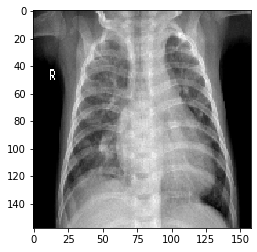

In [10]:
imshow(data_batch[0])
show()

# 5 Models and training  <a class="anchor" id="models-trainning"></a>

We have used Random Forest Classifier, KNeighborsClassifier, DecisionTreeClassifier, LinearRegression, LogisticRegression and Keras Sequential model to predict the occurance of heart disease on a person using the given dataset.

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (158, 158, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 156, 156, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 76, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9

In [12]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    verbose = 0,
    epochs = 100,
    validation_data = dev_generator,
    validation_steps = 10)

model.save('case_2_run_1.h5')

# 6 Results and Discussion  <a class="anchor" id="result-discussion"></a>

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

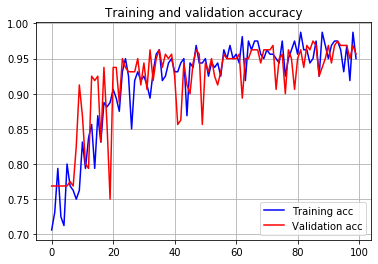

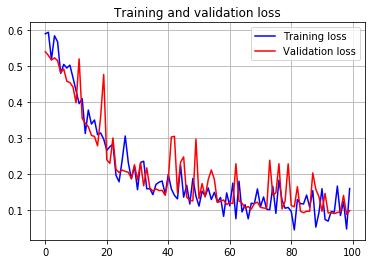

In [15]:
plot(epochs, acc, 'b', label = 'Training acc')
plot(epochs, val_acc, 'r', label = 'Validation acc')
title('Training and validation accuracy')
grid()
legend()

figure()
plot(epochs, loss, 'b', label = 'Training loss')
plot(epochs, val_loss, 'r', label = 'Validation loss')
title('Training and validation loss')
grid()
legend()

show()

# 7 Conclusions  <a class="anchor" id="cas-conclusion"></a>